In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
diabetes_df = pd.read_csv("/diabetes.csv")
diabetes_df.head()
diabetes_df.columns
diabetes_df.info()
diabetes_df.describe()
diabetes_df.describe().T
diabetes_df.isnull().head(10)
diabetes_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
diabetes_df_copy=diabetes_df.copy(deep=True)
diabetes_df_copy[ ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] ] = diabetes_df_copy[ ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] ].replace(0,np.NaN)

In [31]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [36]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna (diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin']. fillna (diabetes_df_copy [ 'Insulin'].median(), inplace=True)
diabetes_df_copy [ 'BMI'].fillna (diabetes_df_copy ['BMI'].median(), inplace = True)
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))

In [37]:
print(diabetes_df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


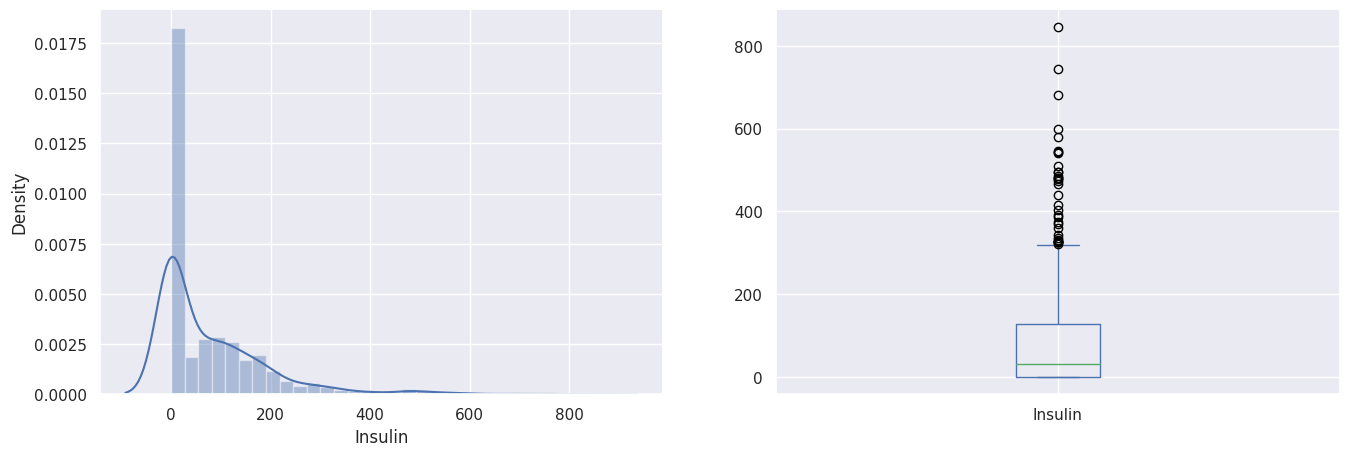

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [38]:
p=diabetes_df.Outcome.value_counts().plot(kind="bar")
plt.subplot(121), sns. distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()
plt.figure(figsize=(12,10))

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

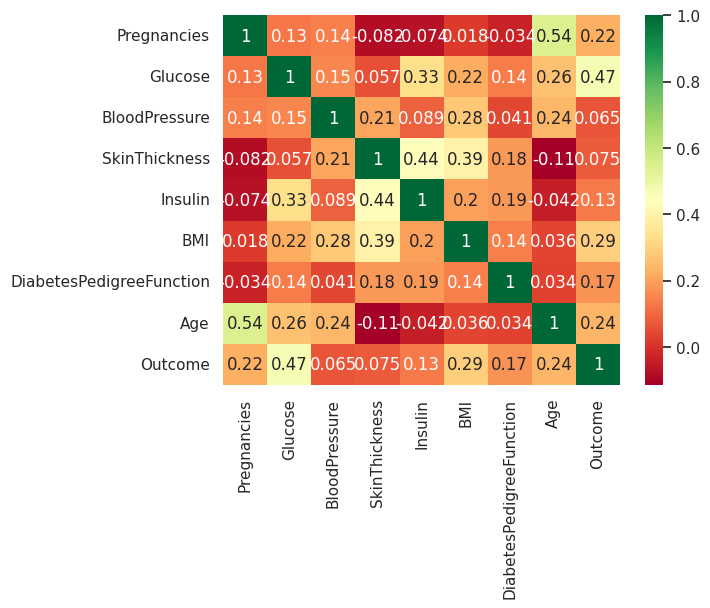

In [46]:
p=sns.heatmap(diabetes_df.corr(), annot=True, cmap = 'RdYlGn')
sc_X = StandardScaler()
x = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"], axis= 1),), columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head()
y = diabetes_df_copy.Outcome
y

In [55]:
x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df[ 'Outcome']
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.33 , random_state=7)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train,y_train)
rfc_train = rfc.predict(x_train)
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score (y_train, rfc_train)))
from sklearn import metrics

Accuracy_Score = 1.0


In [58]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format (metrics.accuracy_score (y_test, predictions)))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report (y_test, predictions))

Accuracy_Score = 0.7716535433070866
[[134  28]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       162
           1       0.69      0.67      0.68        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
from sklearn import metrics
predictions = dtree.predict(X_test)
print("Accuracy Score =", format (metrics.accuracy_score (y_test, predictions)))
from sklearn.metrics import classification_report, confusion_matrix

Accuracy Score = 0.7125984251968503


In [71]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn.svm import SVC

[[128  34]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       162
           1       0.61      0.58      0.59        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.69       254
weighted avg       0.71      0.71      0.71       254



In [73]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(X_test)
from sklearn import metrics
print("Accuracy Score =", format (metrics.accuracy_score (y_test, svc_pred)))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Accuracy Score = 0.7480314960629921
[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



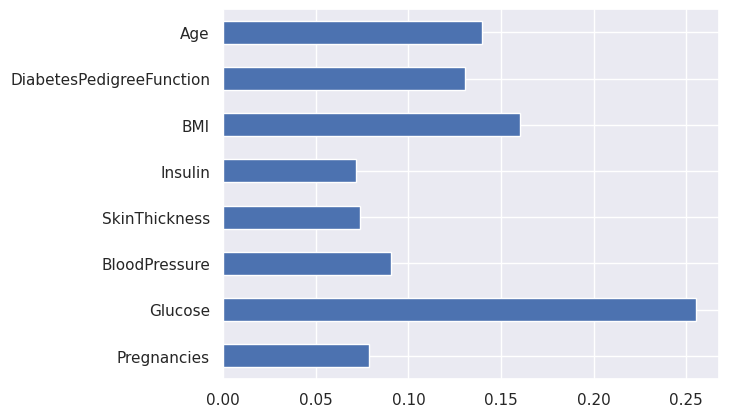

In [78]:
rfc.feature_importances_(pd.Series(rfc.feature_importances_,index=x.columns).plot(kind='barh'))
import pickle
saved_model = pickle.dumps (rfc)
rfc_from_pickle = pickle.loads(saved_model)

In [83]:
rfc_from_pickle.predict(X_test)
rfc.predict([[0,137,40,35,16,43.1,2.228,33]])

array([1])

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [87]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Accuracy_Score =", format (metrics.accuracy_score (y_train, rfc_train)))

Accuracy_Score = 1.0


In [88]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Accuracy_Score =", format (metrics.accuracy_score (y_train, rfc_train)))

Accuracy_Score = 1.0


In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
from sklearn import metrics
predictions=dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score (y_test,predictions)))

Accuracy Score = 0.7125984251968503


In [95]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [96]:
svc_pred = svc_model.predict(X_test)

In [97]:
from sklearn import metrics
print("Accuracy Score =", format (metrics.accuracy_score (y_test, svc_pred)))


Accuracy Score = 0.7480314960629921


In [98]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]])

array([1])

In [99]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])

array([0])